In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from  PIL import Image
import pathlib
import glob
import scrapy.pipelines.images

In [2]:
# importing cats image 
cats = []
for cat in glob.glob('cat_dog/cat/*.jpg'):
    im=Image.open(cat)
    cats.append(im)

In [3]:
# importing dogs image 
dogs = []
for dog in glob.glob('cat_dog/dog/*.jpg'):
    im=Image.open(dog)
    dogs.append(im)

In [4]:
len(cats), len(dogs) 

(200, 200)

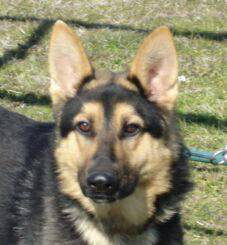

In [5]:
display(dogs[0])

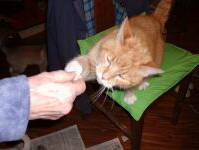

In [6]:
display(cats[0])

In [7]:
X = np.array([])
y = list()
categories = [cat, dog]

In [8]:
# for path, subdirs, files in os.walk("cat_dog"):
#      for name in files:
#             img_path = os.path.join(path,name)
#             correct_cat = subdirs
#             img_pixels = list(Image.open(img_path).getdata())
#             np.append(X, img_pixels)
#             y.append(correct_cat)
        

In [9]:
# image_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

In [10]:
# train_data_gen = image_generator.flow_from_directory(directory='train',
#                                                      subset='training')
# val_data_gen = image_generator.flow_from_directory(directory='train',
#                                                    subset='validation')

In [11]:
data_dir = pathlib.Path('./cat_dog')

In [12]:
data_dir

PosixPath('cat_dog')

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

400


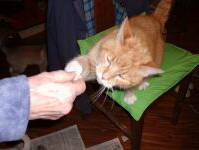

In [14]:
cats = list(data_dir.glob('cat/*'))
PIL.Image.open(str(cats[0]))

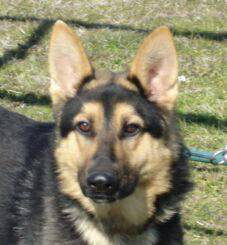

In [15]:
dogs = list(data_dir.glob('dog/*'))
PIL.Image.open(str(dogs[0]))

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 400 files belonging to 2 classes.
Using 320 files for training.


In [17]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 400 files belonging to 2 classes.
Using 80 files for validation.


In [18]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog']


In [19]:
val_ds.class_names

['cat', 'dog']

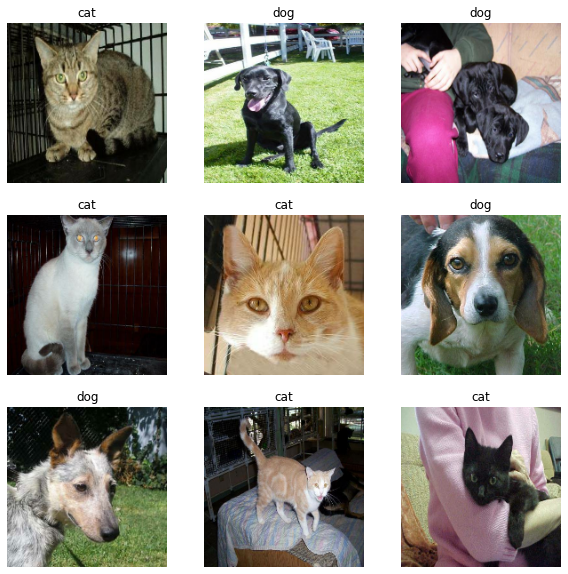

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [22]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 180, 180, 3)
(32,)
